In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Paths to your dataset directories
train_dir = r'E:\Madhur_Project\ECG Dataset'  # Replace with your actual dataset path
test_dir = r'E:\Madhur_Project\ECG Dataset'

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# Load training data from the directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resizing images to 128x128
    batch_size=32,
    color_mode='grayscale',  # ECG images are typically grayscale
    class_mode='binary'  # For binary or multi-class classification
)

# Load test data from the directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary'
)

Found 517 images belonging to 2 classes.
Found 517 images belonging to 2 classes.


In [5]:
# Add Convolutional layers
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

# Add dense layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # 2 output neurons for binary classification (healthy vs unhealthy)


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model using train_generator and test_generator
history = model.fit(train_generator, epochs=13, validation_data=test_generator)


Epoch 1/13


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.5421 - loss: 0.7086 - val_accuracy: 0.5493 - val_loss: 0.6938
Epoch 2/13
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 996ms/step - accuracy: 0.5601 - loss: 0.6843 - val_accuracy: 0.5493 - val_loss: 0.6925
Epoch 3/13
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 989ms/step - accuracy: 0.5396 - loss: 0.6917 - val_accuracy: 0.5493 - val_loss: 0.6895
Epoch 4/13
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5597 - loss: 0.6878 - val_accuracy: 0.5493 - val_loss: 0.6688
Epoch 5/13
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 996ms/step - accuracy: 0.6018 - loss: 0.6523 - val_accuracy: 0.8511 - val_loss: 0.5530
Epoch 6/13
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7716 - loss: 0.5264 - val_accuracy: 0.6673 - val_loss: 0.5392
Epoch 7/13
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7847 - loss: 0.4417 - val_accuracy: 0.8820 - val_loss: 0.2953
Epoch 8/13
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 987ms/step - accuracy: 0.8630 - loss: 0.2948 - val_accuracy: 0.9130 - val_loss

In [7]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")

17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 608ms/step - accuracy: 0.9575 - loss: 0.1274
Test Accuracy: 94.78%


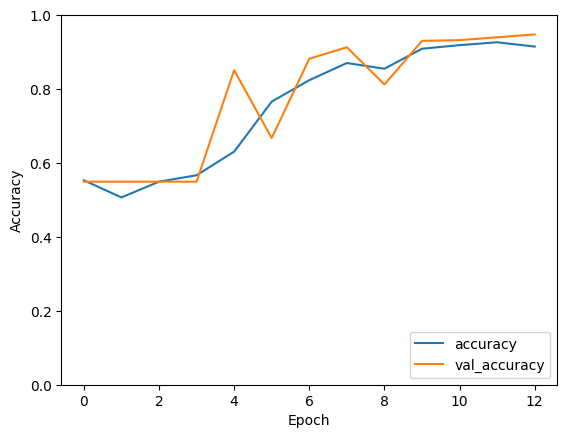

In [8]:
# Plot training history (optional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [19]:
# model.save('cnn_test_01.keras')
model.save('cnn_test_02.h5')

In [10]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [20]:
# model = load_model(r'E:\Madhur_Project\cnn_test_01.keras')
model = load_model(r'E:\Madhur_Project\cnn_test_02.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: Abnormal ECG


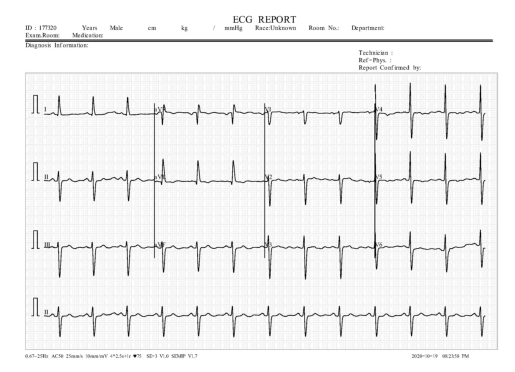

In [23]:
# Function to preprocess the input image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128), color_mode='grayscale')  # Load image
    img_array = image.img_to_array(img)  # Convert the image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array

# Function to make a prediction and interpret the result
def predict_image(model, img_path):
    processed_img = preprocess_image(img_path)  # Preprocess the image
    prediction = model.predict(processed_img)  # Make prediction

    # Assuming binary classification (normal/abnormal)
    #print(prediction[0][0])
    if prediction[0][0] > 0.5:
        result = 'Normal ECG'
    else:
        result = 'Abnormal ECG'

    # Display the result and the image
    print(f"Prediction: {result}")
    img = image.load_img(img_path, color_mode='grayscale')  # Load and show the original image
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # No axis
    plt.show()

img_path = r'E:\Madhur_Project\ECG Dataset\ECG Images of Patient that have abnormal heartbeat (233x12=2796)\HB(189).jpg'
# Make prediction and display results
predict_image(model, img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction: Abnormal ECG


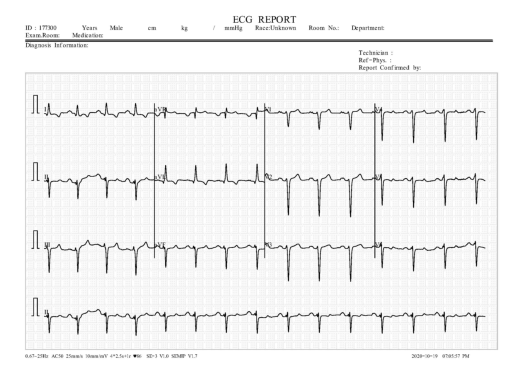

In [24]:
# Path to the ECG image you want to classify
img_path = r'E:\Madhur_Project\ECG Dataset\ECG Images of Patient that have abnormal heartbeat (233x12=2796)\HB(184).jpg'
# Make prediction and display results
predict_image(model, img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: Normal ECG


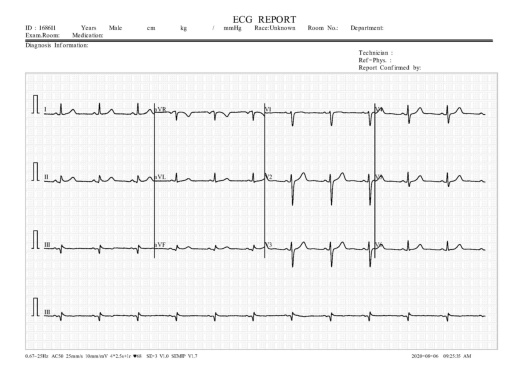

In [25]:
# Path to the ECG image you want to classify
img_path = r'E:\Madhur_Project\ECG Dataset\Normal Person ECG Images (284x12=3408)\Normal(9).jpg'
# Make prediction and display results
predict_image(model, img_path)

17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 588ms/step - accuracy: 0.9498 - loss: 0.1341
Test Accuracy: 0.9478
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 554ms/step
Classification Report:
              precision    recall  f1-score   support

      Normal       0.45      0.43      0.44       233
    Abnormal       0.55      0.57      0.56       284

    accuracy                           0.51       517
   macro avg       0.50      0.50      0.50       517
weighted avg       0.50      0.51      0.51       517

ROC AUC Score: 0.4966


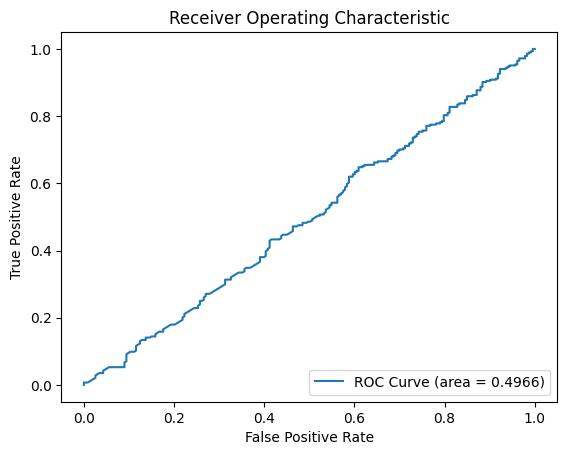